In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [42]:
train = pd.read_csv("training_data.csv")
train.head()

,times,Series1,Series2,Series3,Series4,Series5,Series6,Series7,Series8,Series9,...,Series86,Series87,Series88,Series89,Series90,Series91,Series92,Series93,Series94,Series95
0,1978-11-01,260.350122,265.379448,285.172883,266.774733,256.704939,259.962472,263.321555,262.017348,263.854085,...,258.222624,274.719836,261.387957,254.903019,268.261197,267.028705,271.567729,266.947571,271.930426,271.223367
1,1978-11-02,259.943367,273.526405,266.913075,269.664513,265.024105,263.013930,263.091900,254.997818,273.320973,...,260.759755,256.765620,261.998367,253.702352,259.935957,267.853531,271.902175,267.027663,273.179384,261.041906
2,1978-11-03,261.166744,280.097891,269.548552,262.272449,267.010886,252.386012,264.123102,259.100935,95.843387,...,256.842154,254.905705,255.795448,255.256700,259.801775,267.847792,274.249467,265.555273,283.118344,265.802214
3,1978-11-04,262.674336,260.578072,264.910454,259.518157,256.495576,261.822173,257.527384,261.870500,270.146177,...,261.104169,260.832802,253.945833,260.327452,260.210128,253.954682,275.750938,267.211299,267.702150,270.199622
4,1978-11-05,260.595601,259.042507,264.371437,259.113990,135.053552,263.016093,258.041649,259.521064,281.036349,...,249.897195,261.487449,260.539897,265.635362,260.604379,271.746672,268.425619,213.152892,265.940686,268.912055


In [43]:
# save the times to a Pandas series target
target = train['times']

# Drop the label feature
train = train.drop("times",axis=1)

In [5]:
train.head()

,Series1,Series2,Series3,Series4,Series5,Series6,Series7,Series8,Series9,Series10,...,Series86,Series87,Series88,Series89,Series90,Series91,Series92,Series93,Series94,Series95
0,260.350122,265.379448,285.172883,266.774733,256.704939,259.962472,263.321555,262.017348,263.854085,272.871388,...,258.222624,274.719836,261.387957,254.903019,268.261197,267.028705,271.567729,266.947571,271.930426,271.223367
1,259.943367,273.526405,266.913075,269.664513,265.024105,263.013930,263.091900,254.997818,273.320973,268.203996,...,260.759755,256.765620,261.998367,253.702352,259.935957,267.853531,271.902175,267.027663,273.179384,261.041906
2,261.166744,280.097891,269.548552,262.272449,267.010886,252.386012,264.123102,259.100935,95.843387,275.385646,...,256.842154,254.905705,255.795448,255.256700,259.801775,267.847792,274.249467,265.555273,283.118344,265.802214
3,262.674336,260.578072,264.910454,259.518157,256.495576,261.822173,257.527384,261.870500,270.146177,280.618387,...,261.104169,260.832802,253.945833,260.327452,260.210128,253.954682,275.750938,267.211299,267.702150,270.199622
4,260.595601,259.042507,264.371437,259.113990,135.053552,263.016093,258.041649,259.521064,281.036349,281.804426,...,249.897195,261.487449,260.539897,265.635362,260.604379,271.746672,268.425619,213.152892,265.940686,268.912055


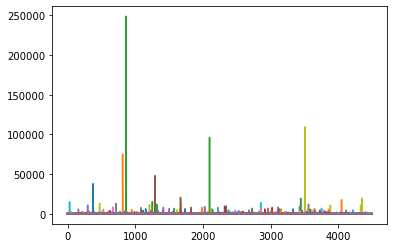

In [6]:
plt.plot(train)

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = train.rolling(12, win_type ='triang').sum()
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

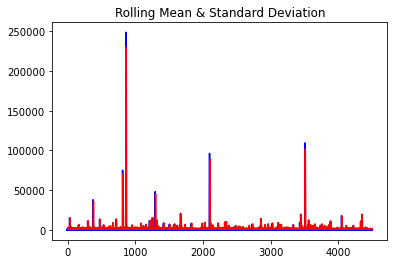

In [12]:
test_stationarity(train)

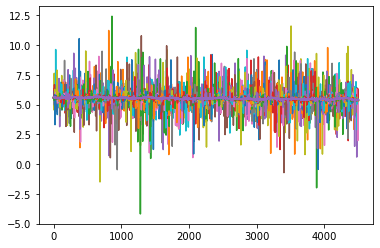

In [13]:
ts_log = np.log(train)
plt.plot(ts_log)

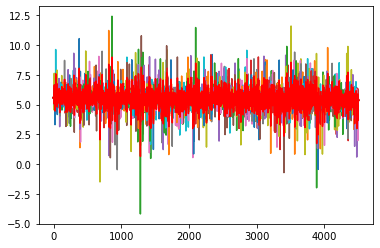

In [18]:
moving_avg = ts_log.rolling(2, win_type ='triang').sum()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

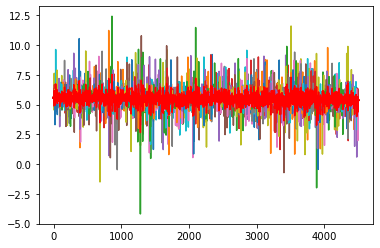

In [28]:
expwighted_avg = pd.Series.ewm(ts_log, halflife=2).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

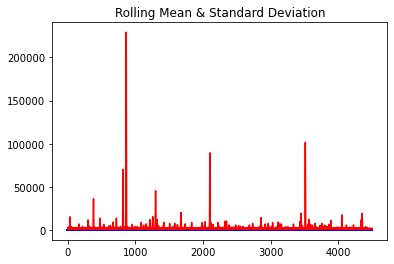

In [29]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

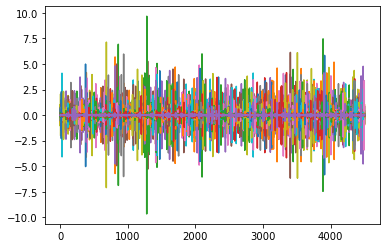

In [30]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

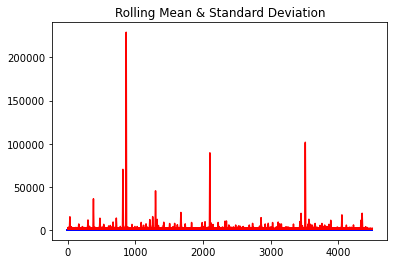

In [31]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)